<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

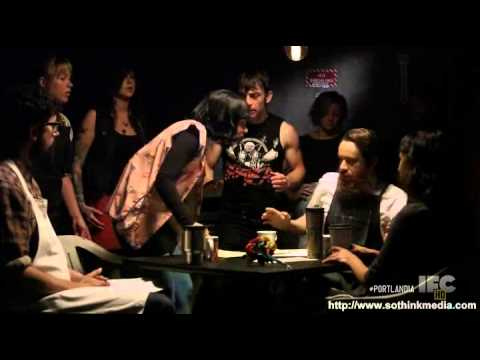

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Stephanie\\Documents\\DS9 Unit 4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
#value counts to see what the names look like
#shops['coffee_shop_name'].value_counts()

In [5]:
#lower case all letters

shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda x: x.lower())
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops['star_rating'] = shops['star_rating'].apply(lambda x: x.lower())


In [6]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating


In [7]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: x.replace("star rating", ""))


In [8]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))

In [9]:
shops['star_rating'].head()

0    5
1    4
2    4
3    2
4    4
Name: star_rating, dtype: int64

In [10]:
import re

def tokenize(text):
    """Parses a string into a list of semantic units (words)
    
    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [11]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [12]:
shops['tokens'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [13]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [14]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [37]:
shops['good_rating'] = (shops['star_rating'] > 3).astype(int)
shops['bad_rating'] = (shops['star_rating'] <= 3).astype(int)

In [38]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,good_rating,bad_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5,"[11/25/2016, check-in, love, love, loved, atmo...",1,0
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4,"[12/2/2016, listed, date, night:, austin,, amb...",1,0
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4,"[11/30/2016, check-in, listed, brunch, spots, ...",1,0
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2,"[11/25/2016, cool, decor!, good, drinks, nice,...",0,1
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4,"[12/3/2016, check-in, located, northcross, mal...",1,0


In [39]:
def count(docs, boohl):
        #create counters
        word_counts = Counter()
        appears_in = Counter()
        #length of docs/x
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc)) #? (stating its in a set w/in doc?)
        #creates a temp dictionary with word counts
        temp = zip(word_counts.keys(), word_counts.values())
        #creates wc df with columns word, and count
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
        #add column named rank, method=first
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()
        #create a function to do word/ total sum variable made above
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        #sort values by rank
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()
        # ^cum. sum of percent total, v create zip of appears_in Counter
        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [40]:
wc = count(shops['tokens'])

In [41]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
72,great,2438,3250,1.0,0.008523,0.008523,0.320116
162,like,2034,2902,2.0,0.007611,0.016134,0.267069
181,good,2084,2779,3.0,0.007288,0.023422,0.273634
4,check-in,1957,1961,4.0,0.005143,0.028565,0.256959
0,love,1434,1806,5.0,0.004736,0.033301,0.188288


## Can we visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [52]:
wc_good = count(shops[shops['good_rating'] == 1]['tokens'])
wc_bad = count(shops[shops['bad_rating'] == 1]['tokens'])

In [53]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
72,great,2174,2902,1.0,0.009776,0.009776,0.354072
327,good,1643,2180,2.0,0.007343,0.017119,0.267590
210,like,1486,2068,3.0,0.006966,0.024085,0.242020
0,love,1263,1604,4.0,0.005403,0.029488,0.205700
4,check-in,1598,1602,5.0,0.005396,0.034885,0.260261


In [54]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
2,like,548,834,1.0,0.009876,0.009876,0.371274
24,good,441,599,2.0,0.007093,0.016969,0.298780
210,don't,340,430,3.0,0.005092,0.022061,0.230352
69,food,266,369,4.0,0.004370,0.026430,0.180217
153,check-in,359,359,5.0,0.004251,0.030682,0.243225


In [56]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
72,great,2438,3250,1.0,0.008523,0.008523,0.320116
162,like,2034,2902,2.0,0.007611,0.016134,0.267069
181,good,2084,2779,3.0,0.007288,0.023422,0.273634
4,check-in,1957,1961,4.0,0.005143,0.028565,0.256959
0,love,1434,1806,5.0,0.004736,0.033301,0.188288


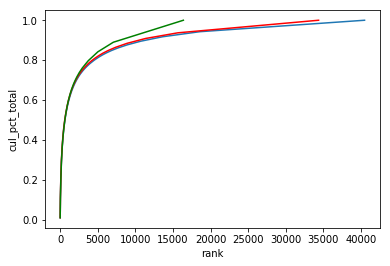

In [62]:
import seaborn as sns
%matplotlib inline

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);
sns.lineplot(x='rank', y='cul_pct_total', data=wc_good, color='red');
sns.lineplot(x='rank', y='cul_pct_total', data=wc_bad, color='green');
plt.show()

The cumulative distribution plot shows an elbow shape, meaning the vast majority of impact is within a smaller percentile of the data. The sharpness of the bend tells us there is a particularly smaller ratio towards the top. Checking the percentage of the top 10 ranked words, they make up roughly 22% of the tokens created.  I feel better seeing more, I feel freaked out by only looking at the top ten, I'd rather see more data to analyze, because in this case, I feel more is better. EXECUTIVE DECISION!

In [21]:
wc[wc['rank'] <= 10]['cul_pct_total'].max()

0.22495429136583414

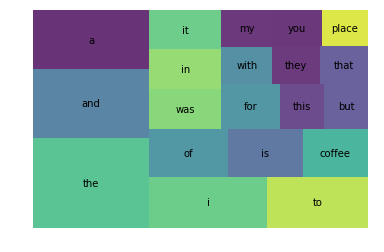

In [22]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Many of these words can be removed via a stop word function. We can do that while we're creating our model via Spacy.Tokenizer, which is literally the most weed-inspired library I have ever looked at.

In [23]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [24]:
tokens = []

""" Make them tokens, awww yisssss """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
    

shops['tokens'] = tokens

In [25]:
shops['tokens'].head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, in, date, night:, austi...
2    [ , 11/30/2016, 1, check-in, listed, in, brunc...
3    [ , 11/25/2016, very, cool, decor!, good, drin...
4    [ , 12/3/2016, 1, check-in, they, are, located...
Name: tokens, dtype: object

In [26]:
wc = count(shops['tokens'])

In [27]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,the,6847,34649,1.0,0.042825,0.042825,0.899028
12,and,6853,26442,2.0,0.032681,0.075506,0.899816
22,a,6240,22657,3.0,0.028003,0.103509,0.819328
52,,7616,22606,4.0,0.027940,0.131449,1.000000
0,i,5511,19990,5.0,0.024707,0.156156,0.723608


To DO: Explain wc_top20 graph

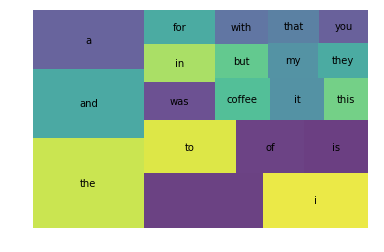

In [28]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [29]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = [] #empty list
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [30]:
wc = count(shops['tokens'])

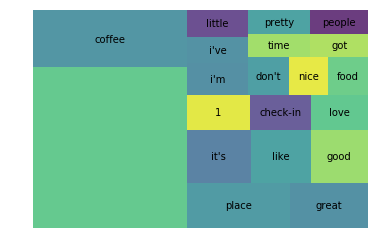

In [31]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

TO DO: Add blurb about implementation of stop_words to improve the information we're getting back. 

In [32]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [33]:
STOP_WORDS = nlp.Defaults.stop_words.union(['i','I', "i've", "1", "i'm",' ', "coffee", 'it', "it's", 'it.', 'the', 'this','place'])

In [34]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [35]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
72,great,2438,3250,1.0,0.008523,0.008523,0.320116
162,like,2034,2902,2.0,0.007611,0.016134,0.267069
181,good,2084,2779,3.0,0.007288,0.023422,0.273634
4,check-in,1957,1961,4.0,0.005143,0.028565,0.256959
0,love,1434,1806,5.0,0.004736,0.033301,0.188288


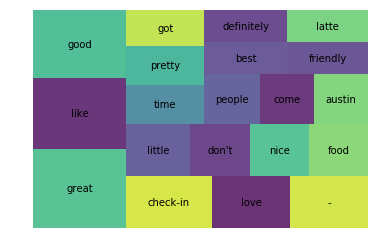

In [36]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

TO DO: create final analysis visualization of top 20 words in bar graph, and write up findings/analysis

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

